### با کمک خط یا منحنی دیتا هارو جدا میکنه مثلا در فضای 3 بعدی مببره

- بهترین برای کلاس بندی
- جنرالیزیشن و پونیلومیا داخل خودش هست
- machines => کلاس بندی

![alt text](image-5.png)

![alt text](image-7.png)



- C = 1 => میزان تحمل خطی => ظریب نرمالیزیشن
- - برای داده‌های نویزی، C را کوچک انتخاب کنید تا از اورفیت جلوگیری شود.
- kernel:['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
- coef0 = 0 => ظریب پلونامیال
- shrinking = True => تغییر سرعت یادگیری
- probability= False => بجای کلاس برگردونه احتمال حظور رو برگیگردونه
- tol = 0.001 => تلورانس مربوت به استاپ => 
- - معیار توقف برای الگوریتم بهینه‌سازی. مقادیر کوچک‌تر → دقت بالاتر، زمان اجرای طولانی‌تر.
- cache_size: Float = 200 => برای مموری
- gamma  (ضریب تأثیر تک نقطه) : برای داده‌های با ابعاد بالا، gamma را کوچک انتخاب کنید.
- verbose:False =>اگر True باشد، جزئیات محاسبات را نمایش می‌دهد.
- "decision_function_shape": ["ovo", "ovr"] =>برای داده‌های با کلاس‌های زیاد، 'ovo' ممکن است بهتر باشد.
-  degree (درجه چندجمله‌ای) =>فقط برای kernel='poly' مؤثر است. درجه چندجمله‌ای را مشخص می‌کند. 
- - مقادیر بالا ممکن است باعث اورفیت شود.

In [95]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score

from sklearn.svm import SVC  # برای کلسیفای بهتره
from sklearn.preprocessing import StandardScaler


In [96]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.shape

(768, 9)

In [98]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [99]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [100]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [101]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [102]:
x = np.array(x)
y = np.array(y)

In [103]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]],
      shape=(768, 8))

In [104]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

normalize

In [105]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [106]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # 20%=>test | 80%=>train 

In [108]:
x_train.shape,y_train.shape


((614, 8), (614,))

In [109]:
x_test.shape,y_test.shape

((154, 8), (154,))

In [110]:


model  = SVC(kernel='linear')
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [111]:
y_pre_test = model.predict(x_test)
y_pre_train = model.predict(x_train)

In [112]:
acc_train = accuracy_score(y_true=y_train,y_pred=y_pre_train)
acc_test = accuracy_score(y_true=y_test,y_pred=y_pre_test)

acc_train,acc_test

(0.7801302931596091, 0.7727272727272727)

In [113]:
pre_test = precision_score(y_true=y_train,y_pred=y_pre_train)
re_test = recall_score(y_true=y_test,y_pred=y_pre_test)

pre_test,re_test

(0.75, 0.6037735849056604)

---

In [114]:
x,y = datasets.make_blobs(500,2,centers=2,cluster_std=1)


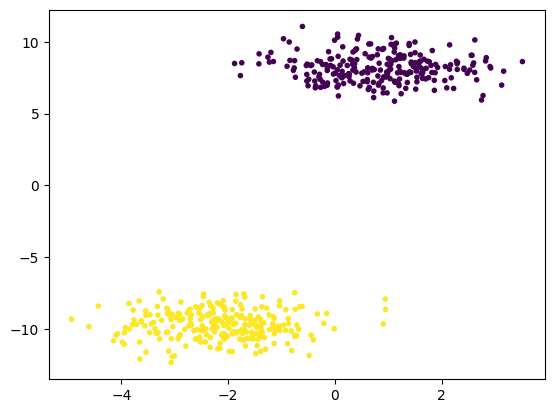

In [115]:
plt.scatter(x[:,0],x[:,1],c = y,marker='.')

In [116]:
model  = SVC(kernel='linear')
model.fit(x,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [117]:
model.score(x,y)

1.0

In [118]:
model.support_vectors_ #نمونه‌هایی از داده‌ها که نزدیک‌ترین به مرز تصمیم‌گیری هستند

array([[ 1.11766376,  5.86790354],
       [-0.75275461, -7.48611301]])

In [119]:
model.coef_,model.intercept_

(array([[-0.02057347, -0.14688607]]), array([-0.11509249]))

In [120]:
w = model.coef_[0]
b = model.intercept_[0]
w,b

(array([-0.02057347, -0.14688607]), np.float64(-0.11509248985793546))

$$
w_0x + w_1y + b = 0
$$

با حل کردن برای y:

$$
w_1y = -w_0x - b
$$

بنابراین:

$$
y = -\frac{w_0}{w_1}x - \frac{b}{w_1}
$$

$$ m = -\frac{w_0}{w_1} $$

$$
y = mx - \frac{b}{w_1}
$$

$$
y = -\frac{w_0}{w_1}x - \frac{b}{w_1}
$$

In [121]:
m = -(w[0] / w[1])
xx = np.linspace(x[:, 0].min(), x[:, 0].max())
# xx = x[:, 0]
yy = m * xx - b / w[1]

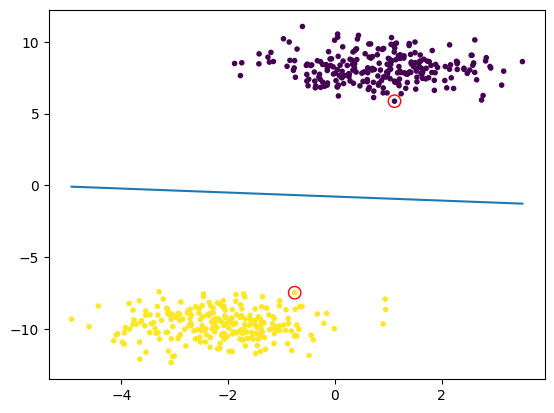

In [122]:
plt.scatter(x[:, 0], x[:, 1], c=y, marker=".")
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    marker="o",
    s=80,
    edgecolors="r",
    facecolor="none",
)

plt.plot(xx,yy)